In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print pd
print pd.__version__

<module 'pandas' from '/home/sandip/anaconda2/lib/python2.7/site-packages/pandas/__init__.pyc'>
0.20.1


In [131]:
from pandas import Series  # Series is a one dimensional array and not a table

In [132]:
marks = [7,10,10,4,4,2,8,10]
s = Series(marks)
print type(s)
print s

<class 'pandas.core.series.Series'>
0     7
1    10
2    10
3     4
4     4
5     2
6     8
7    10
dtype: int64


In [133]:
print s.index  # index is explicit in Pandas
print s.values

RangeIndex(start=0, stop=8, step=1)
[ 7 10 10  4  4  2  8 10]


In [134]:
for i in s.index:
    print i

0
1
2
3
4
5
6
7


In [135]:
rolls = [10, 20, 31, 32, 44, 12, 15, 18]

In [136]:
s2 = Series(data=marks, index=rolls, dtype=np.int16)   # data & index are kwargs
print s2

10     7
20    10
31    10
32     4
44     4
12     2
15     8
18    10
dtype: int16


In [137]:
print 100 in s2  # checking if index present on the Series 
print 20 in s2

False
True


In [138]:
print s2[20]  # by the index based array[10] will return value of index number 10
print s2.iloc[1]  # this is location based for eg. array[1] 

10
10


In [139]:
# slicing
print s2[:3]
print s2[3:] # entire series 3rd and from 4th

10     7
20    10
31    10
dtype: int16
32     4
44     4
12     2
15     8
18    10
dtype: int16


In [140]:
s2.loc[10:32] # location based index and in here last index is included

10     7
20    10
31    10
32     4
dtype: int16

In [141]:
s2.index.name = 'Roll No'
s2.name = 'Marks'
s2
print s2

Roll No
10     7
20    10
31    10
32     4
44     4
12     2
15     8
18    10
Name: Marks, dtype: int16


In [142]:
s2[[10, 44, 32]]  # multiple indexing


Roll No
10    7
44    4
32    4
Name: Marks, dtype: int16

In [143]:
# filtering
s2 > 5  # returns boolean series
print s2[s2 > 5]  # returns filtered series with True value 
rolls_10 = s2[s2 == 10].index


for roll in rolls_10:
    print roll 


Roll No
10     7
20    10
31    10
15     8
18    10
Name: Marks, dtype: int16
20
31
18


In [144]:
# Some analytics on series
# print s2
print 'Sum: {}'.format(s2.sum())
print 'Mean: {}'.format(s2.mean())
print 'Median: {}'.format(s2.median())
print 'Mode: {}'.format(s2.mode())
print 'Min: {}'.format(s2.min())
print 'Max: {}'.format(s2.max())
print s2.describe()

Sum: 55
Mean: 6.875
Median: 7.5
Mode: 0    10
dtype: int16
Min: 2
Max: 10
count     8.000000
mean      6.875000
std       3.181981
min       2.000000
25%       4.000000
50%       7.500000
75%      10.000000
max      10.000000
Name: Marks, dtype: float64


In [145]:
print s2.value_counts()  # returns distinct count of marks
print s2.value_counts(ascending=True)  # returns distinct count of marks 
print s2.value_counts(ascending=True).head(3)  # returns top n values head(n) - UseCase e.g. return top 3 repeated marks
print s2.value_counts().tail(3)  # returns bottom n values tail(n)

10    3
4     2
7     1
2     1
8     1
Name: Marks, dtype: int64
8     1
2     1
7     1
4     2
10    3
Name: Marks, dtype: int64
8    1
2    1
7    1
Name: Marks, dtype: int64
7    1
2    1
8    1
Name: Marks, dtype: int64


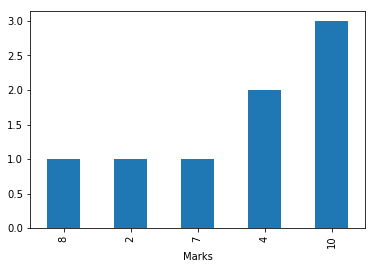

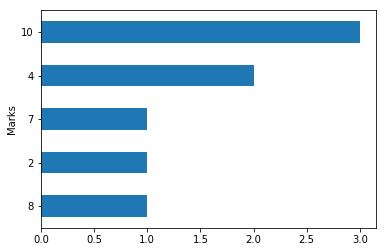

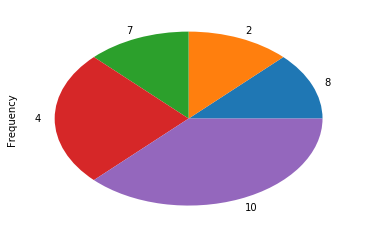

{2: 1, 4: 2, 7: 1, 8: 1, 10: 3}

In [164]:
mark_frequency = s2.value_counts(ascending=True)
mark_frequency.index.name = 'Marks'
mark_frequency.name = 'Frequency'
mark_frequency.plot(kind='bar')
plt.show()
mark_frequency.plot(kind='barh')
plt.show()
mark_frequency.plot(kind='pie')
plt.show()
mark_frequency.to_csv(path='/home/sandip/code/GA/data_files/generated_frequent_marks', header=True)
mark_frequency.to_dict()

In [177]:
# reading from a file
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.from_csv.html#pandas-series-from-csv
mf = pd.Series.from_csv(path='/home/sandip/code/GA/data_files/generated_frequent_marks', header=0)
print mf

Marks
8     1
2     1
7     1
4     2
10    3
Name: Frequency, dtype: int64


In [181]:
# sorting
s2.sort_index()
s2.sort_values(ascending=True)

Roll No
12     2
32     4
44     4
10     7
15     8
20    10
31    10
18    10
Name: Marks, dtype: int16